# Exploratory Data Analysis
**Obiettivo**: Analizzare il dataset Global Cybersecurity Threats 2015-2024

In [ ]:
# Dependency imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

# Configurazione visualizzazioni
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

ModuleNotFoundError: No module named 'light_palette'

## Dataset Overview

In [ ]:
# Load dataset
df = pd.read_csv('../data/Global_Cybersecurity_Threats_2015-2024.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
df.info()
df.describe()

Dataset shape: (3000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


## Q1: Top Most Attacked Country 

C:\Users\cater\AppData\Local\Temp\ipykernel_10120\3710020079.py:14: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



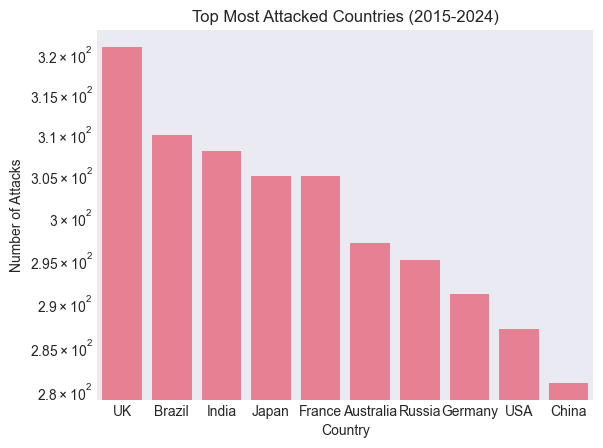

In [ ]:
top_attacked_countries = df['Country'].value_counts()

barplot = sns.barplot(x=top_attacked_countries.index, y=top_attacked_countries.values)
barplot.set_xlabel('Country')
barplot.set_ylabel('Number of Attacks')
barplot.set_title('Top Most Attacked Countries (2015-2024)')
plt.yscale('log')


# Mappa Plotly (CORRETTO)
country_attacks = df['Country'].value_counts().reset_index()
country_attacks.columns = ['Country', 'Number of Attacks']

fig = px.choropleth(country_attacks,
                    locations='Country',
                    locationmode='country names',
                    color='Number of Attacks',
                    hover_name='Country',
                    color_continuous_scale='Reds',
                    title='Numero di Attacchi per Paese (2015-2024)',
                    height=500, width=800)
fig.show()

# Q2: Mean Financial Loss per Country

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'USA'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'Brazil'),
  Text(5, 0, 'Russia'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'France'),
  Text(8, 0, 'China'),
  Text(9, 0, 'India')])

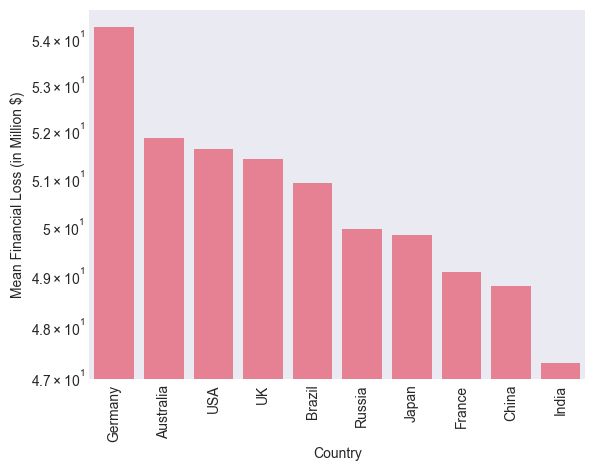

In [ ]:
financial_loss_by_country = df.groupby('Country')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
barplot = sns.barplot(x=financial_loss_by_country.index, y=financial_loss_by_country.values)
barplot.set_xlabel('Country')
barplot.set_ylabel('Mean Financial Loss (in Million $)')
plt.yscale('log')
plt.xticks(rotation=90)

# Q3: Targeted Industry Sectors
## Related to Mean Financial Loss

Text(54.583333333333314, 0.5, 'Target Industry')

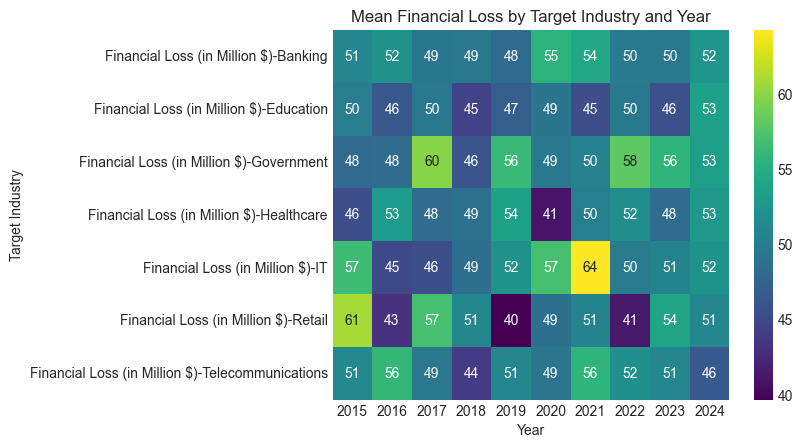

In [ ]:
target_industry_by_year = df.groupby(['Year', 'Target Industry']).agg({'Financial Loss (in Million $)': 'mean'}).unstack().fillna(0)

# Transpose
target_industry_by_year = target_industry_by_year.T

# Heatmap of mean financial loss by target industry and year
heatmap = sns.heatmap(target_industry_by_year, annot=True, cmap='viridis')
heatmap.set_title('Mean Financial Loss by Target Industry and Year')
heatmap.set_xlabel('Year')
heatmap.set_ylabel('Target Industry')

# Q4: Defence Mechanism Effectiveness by Attack Type

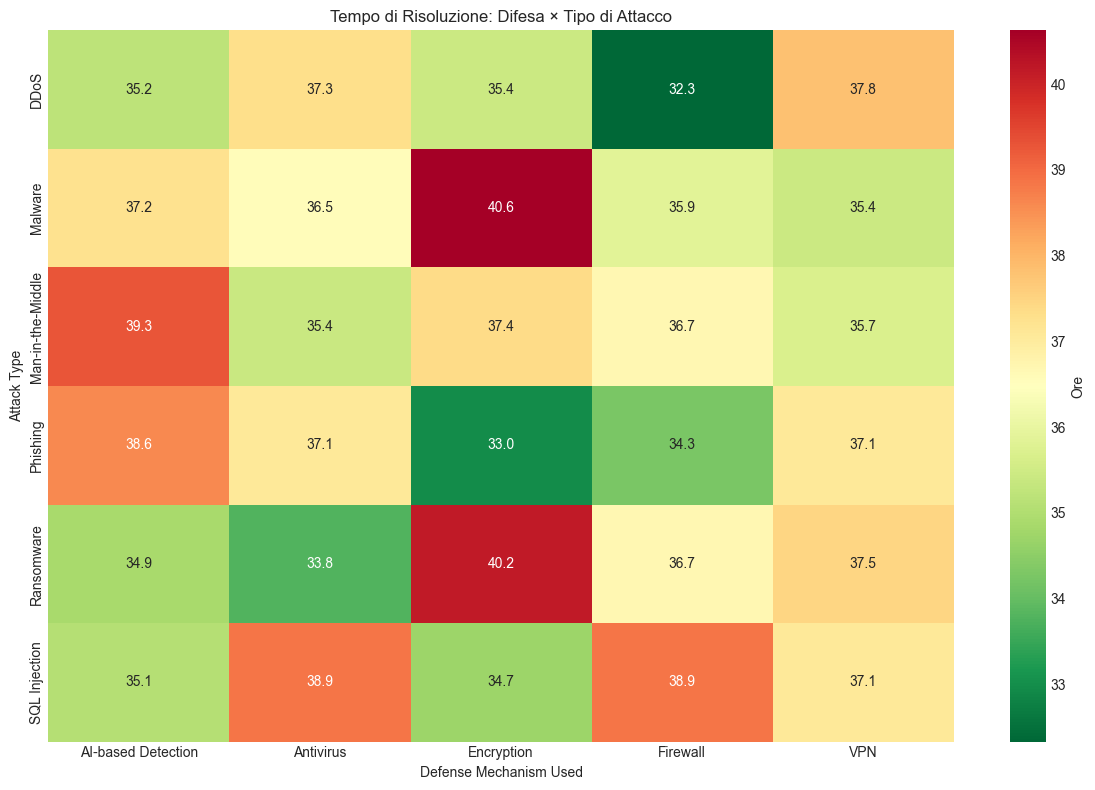

In [ ]:
defense_effectiveness = df.pivot_table(
    values='Incident Resolution Time (in Hours)',
    index='Attack Type',
    columns='Defense Mechanism Used',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(defense_effectiveness, annot=True, fmt='.1f',
            cmap='RdYlGn_r', cbar_kws={'label': 'Ore'})
plt.title('Tempo di Risoluzione: Difesa × Tipo di Attacco')
plt.tight_layout()
plt.show()

# Q5: Distribution of Attacked Country

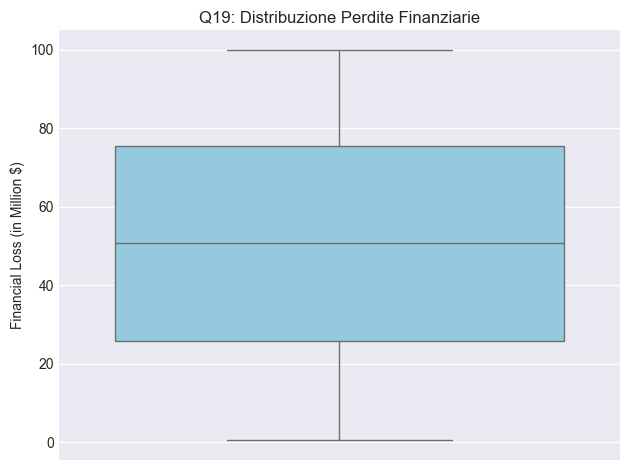

In [ ]:
# Boxplot (LEGGI NOTE!!)
boxplot = sns.boxplot(data=df, y='Financial Loss (in Million $)',color='skyblue')
boxplot.set_title('Q19: Distribuzione Perdite Finanziarie')

plt.tight_layout()
plt.show()

# Correlation Analysis

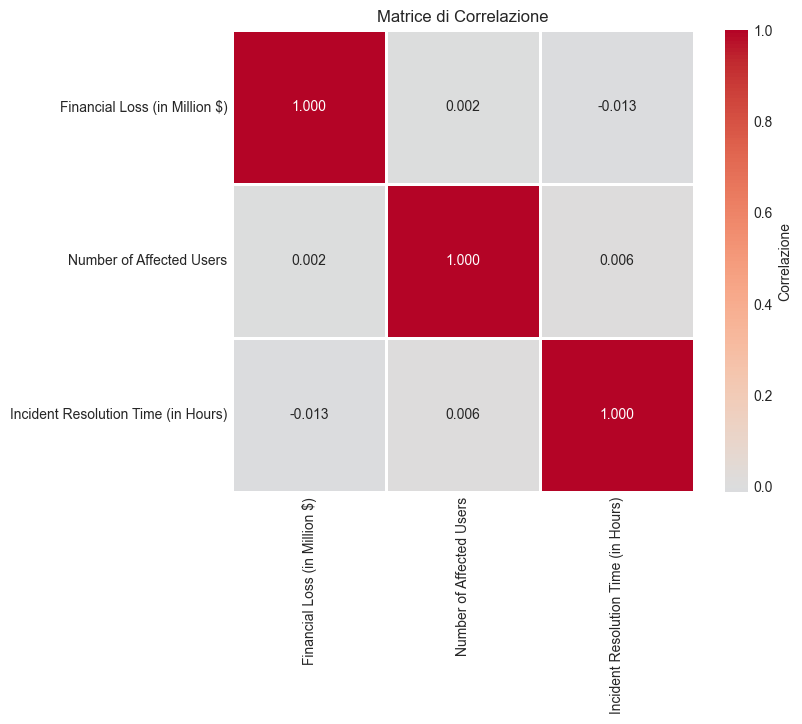

In [ ]:
corr_matrix = df[['Financial Loss (in Million $)', 'Number of Affected Users',
                  'Incident Resolution Time (in Hours)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={'label': 'Correlazione'})
plt.title('Matrice di Correlazione')
plt.show()

# Defense Mechanisms with shorter Resolution Time

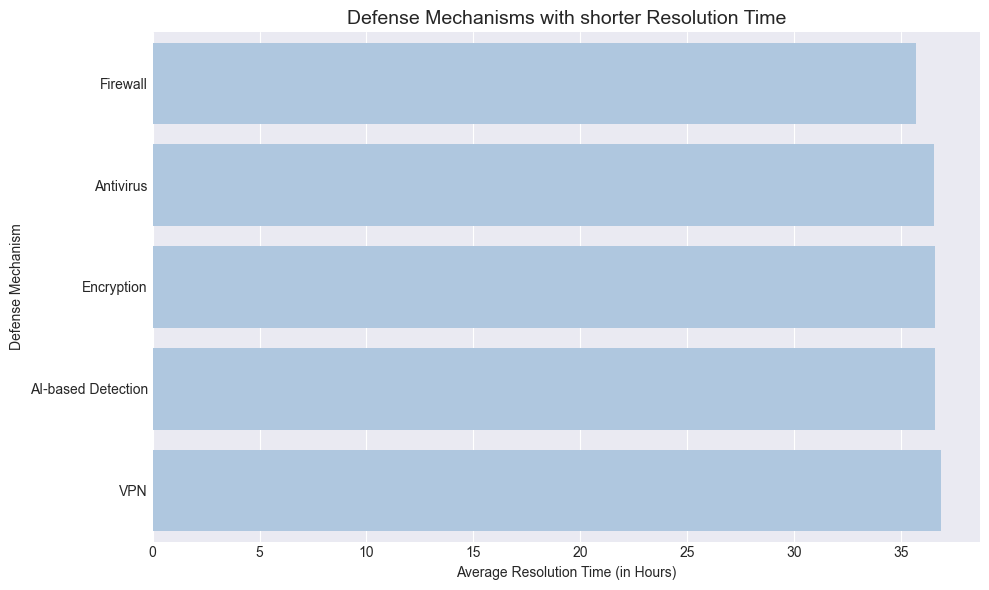

In [ ]:

avg_resolution = (
    df.groupby("Defense Mechanism Used")["Incident Resolution Time (in Hours)"]
    .mean()
    .sort_values()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_resolution,
    x="Incident Resolution Time (in Hours)",
    y="Defense Mechanism Used",
    color="#A7C7E7"
)
plt.title("Defense mechanisms with shorter resolution time", fontsize=14)
plt.xlabel("Average Resolution Time (in Hours)")
plt.ylabel("Defense Mechanism")
plt.tight_layout()
plt.show()

# Vulnerabilities that generate higher economic loss

C:\Users\cater\AppData\Local\Temp\ipykernel_10120\1552035009.py:13: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



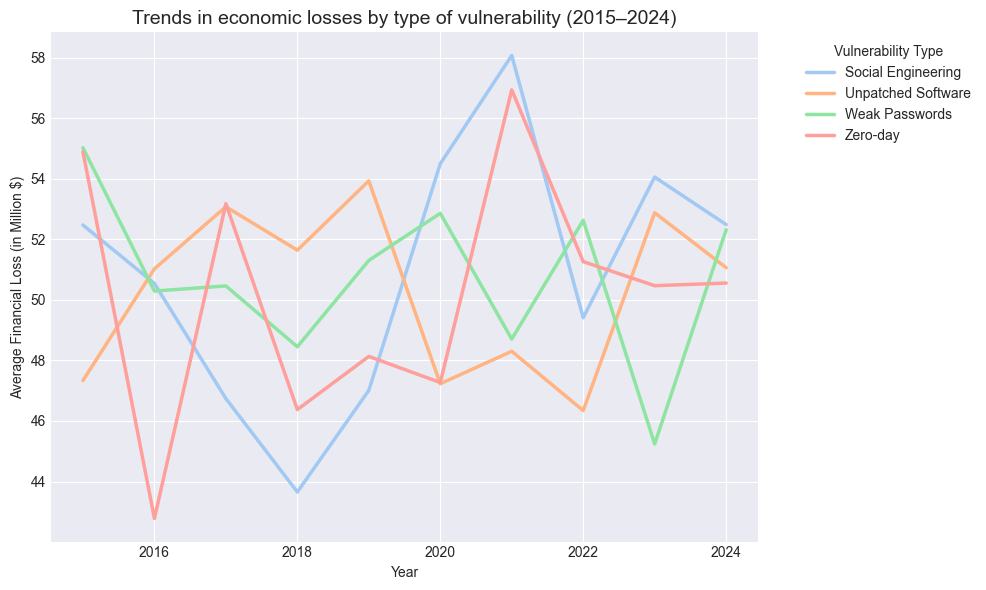

In [ ]:
loss_by_vuln = (
    df.groupby(["Year", "Security Vulnerability Type"])["Financial Loss (in Million $)"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))


palette = sns.color_palette("pastel")

sns.lineplot(
    data=loss_by_vuln,
    x="Year",
    y="Financial Loss (in Million $)",
    hue="Security Vulnerability Type",
    linewidth=2.5,
    palette=palette
)

plt.title("Trends in economic losses by type of vulnerability (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Financial Loss (in Million $)")
plt.legend(title="Vulnerability Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()





# Vulnerabilities that generate higher economic loss (v.2)

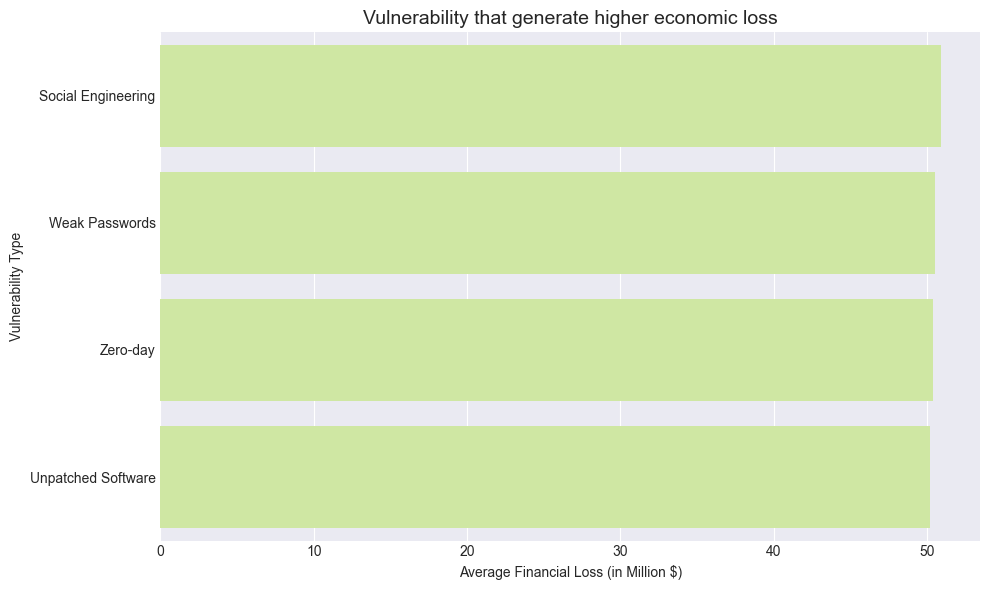

In [51]:
loss_by_vuln = (
    df.groupby("Security Vulnerability Type")["Financial Loss (in Million $)"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=loss_by_vuln,
    x="Financial Loss (in Million $)",
    y="Security Vulnerability Type",
    color="#d2f298"
)
plt.title("Vulnerability that generate higher economic loss", fontsize=14)
plt.xlabel("Average Financial Loss (in Million $)")
plt.ylabel("Vulnerability Type")
plt.tight_layout()
plt.show()
